In [1]:
import numpy as np
import pandas as pd
from src_code.dbConnector import *

In [2]:
import socket
server = f'{socket.gethostname()}.local'
username = 'sa'  
password = 'nguyenson1509' 
driver = '{ODBC Driver 17 for SQL Server}'

In [3]:
investingData = dbJob(server, "investing_com_data", username, password, driver)
usd_vnd = investingData.getData("USD_VND_rawData")
usd_cny = investingData.getData("USD_CNY_rawData")
vnindex = investingData.getData("VNINDEX_rawData")
brent_oil = investingData.getData("XBR_USD_rawData")
wti_oil = investingData.getData("WTI_USD_rawData")
gold_price = investingData.getData("XAU_USD_rawData")

In [4]:
debtData = dbJob(server, "debt_data", username, password, driver)
tpcpVN = debtData.getData("tpcp_yield_scndMkt_rawData")

<AxesSubplot:xlabel='date'>

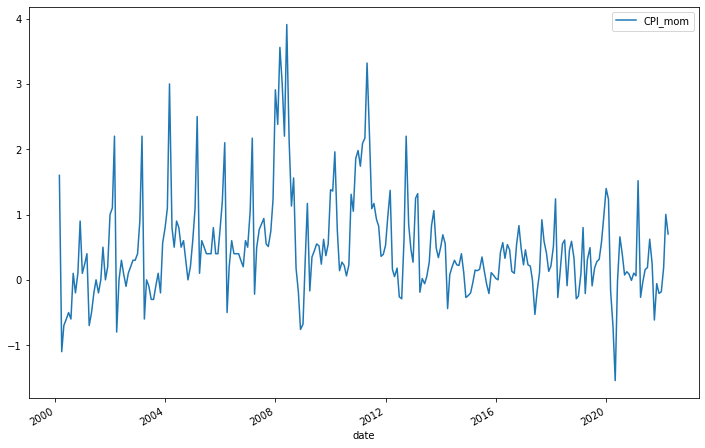

In [5]:
macroData = dbJob(server, "macro_data", username, password, driver)
cpiVN = macroData.getData("cpi_rawData")

cpiVN = cpiVN[['date', 'CPI_mom']]
cpiVN = cpiVN.set_index('date')
cpiVN = cpiVN - 100
cpiVN.plot(figsize = (12, 8))

<AxesSubplot:xlabel='date'>

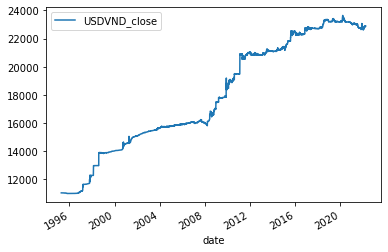

In [6]:
usd_vnd = usd_vnd[['date', 'USDVND_close']]
usd_vnd = usd_vnd.set_index('date')
usd_vnd.plot()

<AxesSubplot:xlabel='date'>

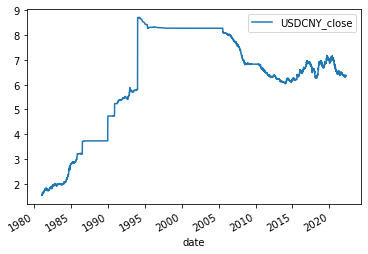

In [7]:
usd_cny = usd_cny[['date', 'USDCNY_close']]
usd_cny = usd_cny.set_index('date')
usd_cny.plot()

<AxesSubplot:xlabel='date'>

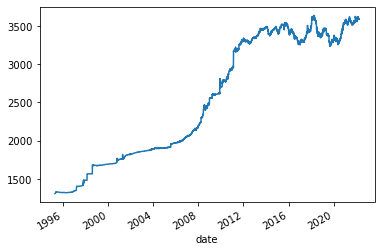

In [8]:
vnd_cny = pd.concat([usd_cny, usd_vnd], axis = 1)
vnd_cny['VNDCNY_close'] = 1/vnd_cny['USDCNY_close'] * vnd_cny['USDVND_close']
vnd_cny = vnd_cny['VNDCNY_close']
vnd_cny = vnd_cny.dropna()
vnd_cny.plot()

<AxesSubplot:xlabel='date'>

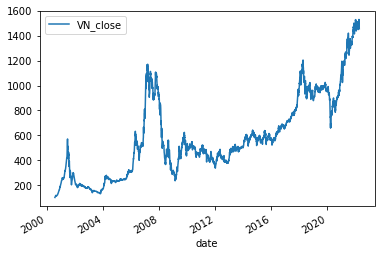

In [9]:
vnindex = vnindex[['date', 'VN_close']]
vnindex = vnindex.set_index('date')
vnindex.plot()

<AxesSubplot:xlabel='date'>

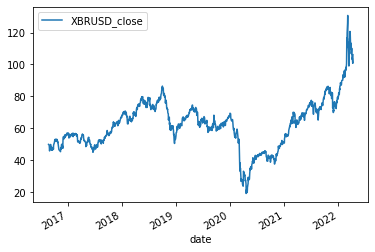

In [10]:
brent_oil = brent_oil[['date', 'XBRUSD_close']]
brent_oil = brent_oil.set_index('date')
brent_oil.plot()

<AxesSubplot:xlabel='date'>

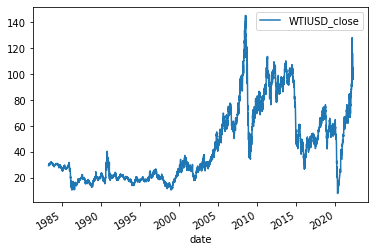

In [11]:
wti_oil = wti_oil[['date', 'WTIUSD_close']]
wti_oil = wti_oil.set_index('date')
wti_oil.plot()

<AxesSubplot:xlabel='date'>

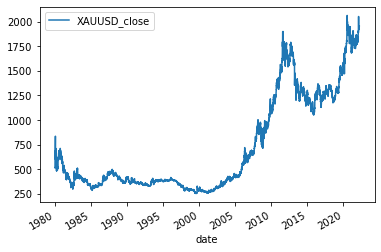

In [12]:
gold_price = gold_price[['date', 'XAUUSD_close']]
gold_price = gold_price.set_index('date')
gold_price.plot()

<AxesSubplot:xlabel='date'>

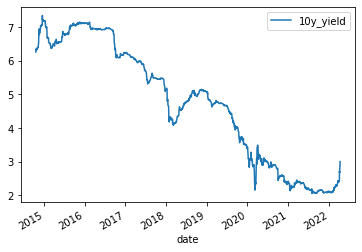

In [13]:
tpcpVN = tpcpVN[['date', '10y_yield']]
tpcpVN = tpcpVN.set_index('date')
tpcpVN.plot()

## JOIN DATA

In [14]:
from functools import reduce

In [15]:
cpiVN.index = cpiVN.index.to_period("M")

In [16]:
cpiVN

,CPI_mom
date,
2000-02,1.600000
2000-03,-1.100000
2000-04,-0.700000
2000-05,-0.600000
2000-06,-0.501253
...,...
2021-11,-0.207800
2021-12,-0.181600
2022-01,0.191600


In [17]:
data_long = pd.concat([usd_vnd, vnd_cny, wti_oil, gold_price, vnindex], axis = 1)
data_long = data_long.dropna()
data_long

,USDVND_close,VNDCNY_close,WTIUSD_close,XAUUSD_close,VN_close
date,,,,,
2000-07-31,14092.0,1702.096903,27.430000,277.250000,101.550003
2000-08-02,14095.0,1702.479652,28.260000,277.549988,103.379997
2000-08-04,14096.0,1702.456496,29.959999,273.250000,105.199997
2000-08-07,14097.5,1702.617264,28.910000,273.750000,106.919998
2000-08-09,14098.0,1702.698047,30.350000,272.850006,108.639999
...,...,...,...,...,...
2022-04-05,22858.0,3591.879066,101.940002,1923.530029,1520.000000
2022-04-06,22867.5,3594.106090,97.589996,1925.319946,1522.900000
2022-04-07,22858.0,3592.387119,97.690002,1932.170044,1502.350000


In [18]:
data_long_month = data_long.resample("M").mean()
data_long_month.index = data_long_month.index.to_period("M")
data_long_month = pd.merge(data_long_month ,cpiVN, left_index=True, right_index=True, how = 'inner')
data_long_month

,USDVND_close,VNDCNY_close,WTIUSD_close,XAUUSD_close,VN_close,CPI_mom
date,,,,,,
2000-07,14092.000000,1702.096903,27.430000,277.250000,101.550003,-0.6000
2000-08,14104.884615,1703.569200,31.303077,274.634615,112.545384,0.1000
2000-09,14161.750000,1710.650599,33.951667,273.641665,116.753335,-0.2000
2000-10,14421.384615,1742.030493,32.864616,269.923075,130.481540,0.1000
2000-11,14468.416667,1747.963195,34.350834,265.816666,157.290002,0.9000
...,...,...,...,...,...,...
2021-11,22676.045455,3549.278049,79.005001,1817.903637,1466.741350,-0.2078
2021-12,22912.772727,3597.913445,72.113181,1791.792286,1471.975902,-0.1816
2022-01,22689.368421,3570.476168,83.348421,1817.727378,1485.635781,0.1916


In [19]:
data_all = pd.concat([usd_vnd, vnd_cny, wti_oil, gold_price, vnindex, tpcpVN], axis = 1)
data_all = data_all.dropna()
data_all

,USDVND_close,VNDCNY_close,WTIUSD_close,XAUUSD_close,VN_close,10y_yield
date,,,,,,
2014-10-20,21255.0,3471.054209,82.720001,1246.599976,589.239990,6.260
2014-10-21,21265.0,3474.105644,82.809998,1249.300049,600.549988,6.290
2014-10-22,21245.0,3472.426630,80.360001,1241.030029,601.590027,6.350
2014-10-23,21265.0,3474.957013,81.910004,1232.150024,593.530029,6.320
2014-10-24,21275.0,3478.012039,81.309998,1231.459961,591.510010,6.330
...,...,...,...,...,...,...
2022-04-05,22858.0,3591.879066,101.940002,1923.530029,1520.000000,2.439
2022-04-06,22867.5,3594.106090,97.589996,1925.319946,1522.900000,2.714
2022-04-07,22858.0,3592.387119,97.690002,1932.170044,1502.350000,2.667


In [23]:
data_all.resample("M").mean()

,USDVND_close,VNDCNY_close,WTIUSD_close,XAUUSD_close,VN_close,10y_yield
date,,,,,,
2014-10-31,21268.000000,3477.017455,81.496000,1223.946021,592.153009,6.332000
2014-11-30,21327.842105,3481.927459,75.672105,1176.095799,594.147895,6.640000
2014-12-31,21374.659091,3452.972081,59.282727,1199.463634,548.846363,7.120455
2015-01-31,21358.868421,3434.351293,46.961579,1257.178415,571.323679,7.048947
2015-02-28,21309.892857,3408.818597,50.586428,1234.002860,579.373566,6.611429
...,...,...,...,...,...,...
2021-12-31,22909.571429,3597.649215,72.173809,1792.617635,1472.166184,2.095714
2022-01-31,22689.368421,3570.476168,83.348421,1817.727378,1485.635781,2.087895
2022-02-28,22744.230769,3586.012758,92.653077,1866.479239,1498.969989,2.168308


In [20]:
# Add CPI
data_all_month = data_all.resample("M").mean()
data_all_month.index = data_all_month.index.to_period("M")
data_all_month = pd.merge(data_all_month,cpiVN, left_index=True, right_index=True, how = 'inner')
data_all_month

,USDVND_close,VNDCNY_close,WTIUSD_close,XAUUSD_close,VN_close,10y_yield,CPI_mom
date,,,,,,,
2014-10,21268.000000,3477.017455,81.496000,1223.946021,592.153009,6.332000,0.1100
2014-11,21327.842105,3481.927459,75.672105,1176.095799,594.147895,6.640000,-0.2700
2014-12,21374.659091,3452.972081,59.282727,1199.463634,548.846363,7.120455,-0.2400
2015-01,21358.868421,3434.351293,46.961579,1257.178415,571.323679,7.048947,-0.2000
2015-02,21309.892857,3408.818597,50.586428,1234.002860,579.373566,6.611429,-0.0500
...,...,...,...,...,...,...,...
2021-11,22676.045455,3549.278049,79.005001,1817.903637,1466.741350,2.096818,-0.2078
2021-12,22909.571429,3597.649215,72.173809,1792.617635,1472.166184,2.095714,-0.1816
2022-01,22689.368421,3570.476168,83.348421,1817.727378,1485.635781,2.087895,0.1916


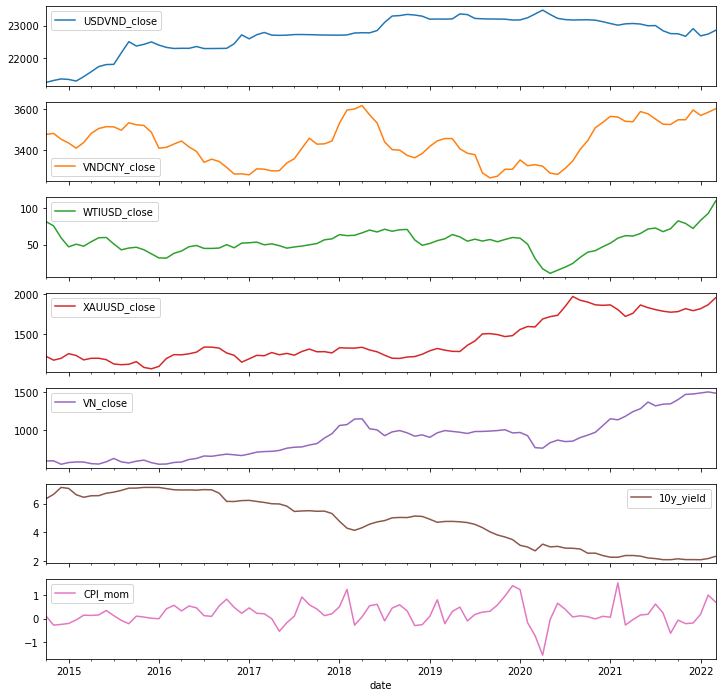

In [21]:
data_all_month.plot(figsize = (12, 12), subplots = True);

In [22]:
# data_long.to_csv('./data/data_long.csv') # no tpcp, no cpi
# data_long_month.to_csv('./data/data_long_month.csv') # no tpcp, have cpi
# data_all.to_csv('./data/data_short.csv') # have tpcp, no cpi
# data_all_month.to_csv('./data/data_all_var.csv') # have tpcp, have cpi